In [76]:
import requests
import torch
from PIL import Image
from transformers import AutoProcessor, AutoModelForZeroShotObjectDetection
model_id = "IDEA-Research/grounding-dino-base"
device = "cuda"
processor = AutoProcessor.from_pretrained(model_id)
model = AutoModelForZeroShotObjectDetection.from_pretrained(model_id).to(device)


Could not load the custom kernel for multi-scale deformable attention: DLL load failed while importing MultiScaleDeformableAttention: The specified module could not be found.
Could not load the custom kernel for multi-scale deformable attention: DLL load failed while importing MultiScaleDeformableAttention: The specified module could not be found.
Could not load the custom kernel for multi-scale deformable attention: DLL load failed while importing MultiScaleDeformableAttention: The specified module could not be found.
Could not load the custom kernel for multi-scale deformable attention: DLL load failed while importing MultiScaleDeformableAttention: The specified module could not be found.
Could not load the custom kernel for multi-scale deformable attention: DLL load failed while importing MultiScaleDeformableAttention: The specified module could not be found.
Could not load the custom kernel for multi-scale deformable attention: DLL load failed while importing MultiScaleDeformableAt

prompt: cars


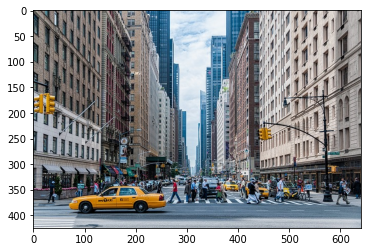

In [77]:
# load image and show it
import matplotlib.pyplot as plt
image_url = "oil_rig.jpg"
image = Image.open(image_url)
prompt = "cars"
print("prompt: "+prompt)
plt.imshow(image)
plt.show()


In [78]:

inputs = processor(images=image, text=prompt, return_tensors="pt").to(device)
with torch.no_grad():
    outputs = model(**inputs)
    results = processor.post_process_grounded_object_detection(
    outputs,
    inputs.input_ids,
    box_threshold=0.1,
    text_threshold=0.3,
    target_sizes=[image.size[::-1]]
    )
    print(results)

[{'scores': tensor([0.1336], device='cuda:0'), 'labels': [''], 'boxes': tensor([[ 69.9481, 341.3354, 260.6842, 396.4747]], device='cuda:0')}]


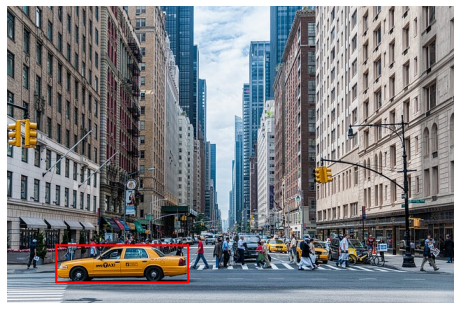

In [79]:
import numpy as np
from PIL import Image, ImageDraw
import matplotlib.pyplot as plt

# Convert image to RGBA if not already in that format
image = image.convert("RGBA")

# Create a draw object
draw = ImageDraw.Draw(image)

# Access the first (and possibly only) element in results
for result in results:
    boxes = result["boxes"].cpu().tolist()  # Convert tensor to list and move to CPU
    
    # Draw the rectangle for each box
    for box in boxes:
        draw.rectangle(box, outline="red", width=3)

# Display the image using matplotlib
plt.figure(figsize=(8, 8))  # Set the figure size if needed
plt.imshow(image)
plt.axis('off')  # Hide axes for better visualization
plt.show()
